## Задание:

По аналогии с реализацией GD и SGD реализуйте метод инерции (Momentum), RMSprop и Adam.

Для произвольной задачи (можно сгенерировать синтетически матрицу X и вектор y) сравните результаты работы трех методов оптимизации.

Проведите эксперименты с этими методами для задач разных размерностей, сравните оценки сходимости и сделайте выводы по эмпирическим результатам о скорости и точности сходимости в зависимости от размерности и параметров моделей.


In [4]:
import numpy as np
import matplotlib.pyplot as plt


Сгенерируем данные

In [6]:
def generate_data(n_samples=100, n_features=10):
    np.random.seed(42)
    X = np.random.randn(n_samples, n_features)
    weights = np.random.randn(n_features)
    y = X @ weights + np.random.randn(n_samples) * 0.1 
    return X, y, weights

Функция потерь и градиент

In [7]:
def compute_loss(X, y, w):
    predictions = X @ w
    loss = np.mean((predictions - y) ** 2)
    return loss

def compute_gradient(X, y, w):
    n_samples = X.shape[0]
    return (2 / n_samples) * X.T @ (X @ w - y)

Градиентный спуск методом Momentum

In [8]:
def momentum(X, y, lr=0.01, beta=0.9, epochs=100):
    w = np.zeros(X.shape[1])
    v = np.zeros_like(w)
    losses = []
    
    for _ in range(epochs):
        grad = compute_gradient(X, y, w)
        v = beta * v - lr * grad
        w += v
        losses.append(compute_loss(X, y, w))
    
    return w, losses

Градиентный спуск RMSprop

In [9]:
def rmsprop(X, y, lr=0.01, beta=0.9, epsilon=1e-8, epochs=100):
    w = np.zeros(X.shape[1])
    s = np.zeros_like(w)
    losses = []
    
    for _ in range(epochs):
        grad = compute_gradient(X, y, w)
        s = beta * s + (1 - beta) * grad ** 2
        w -= lr * grad / (np.sqrt(s) + epsilon)
        losses.append(compute_loss(X, y, w))
    
    return w, losses

Градиентный спуск Adam

In [19]:
def adam(X, y, lr=0.01, beta1=0.9, beta2=0.9, epsilon=1e-8, epochs=100):
    w = np.zeros(X.shape[1])
    m = np.zeros_like(w)
    v = np.zeros_like(w)
    losses = []
    
    for t in range(1, epochs + 1):
        grad = compute_gradient(X, y, w)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad ** 2
        
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)
        
        w -= lr * m_hat / (np.sqrt(v_hat) + epsilon)
        losses.append(compute_loss(X, y, w))
    
    return w, losses

Сравнение трех подходов для разных размерностей

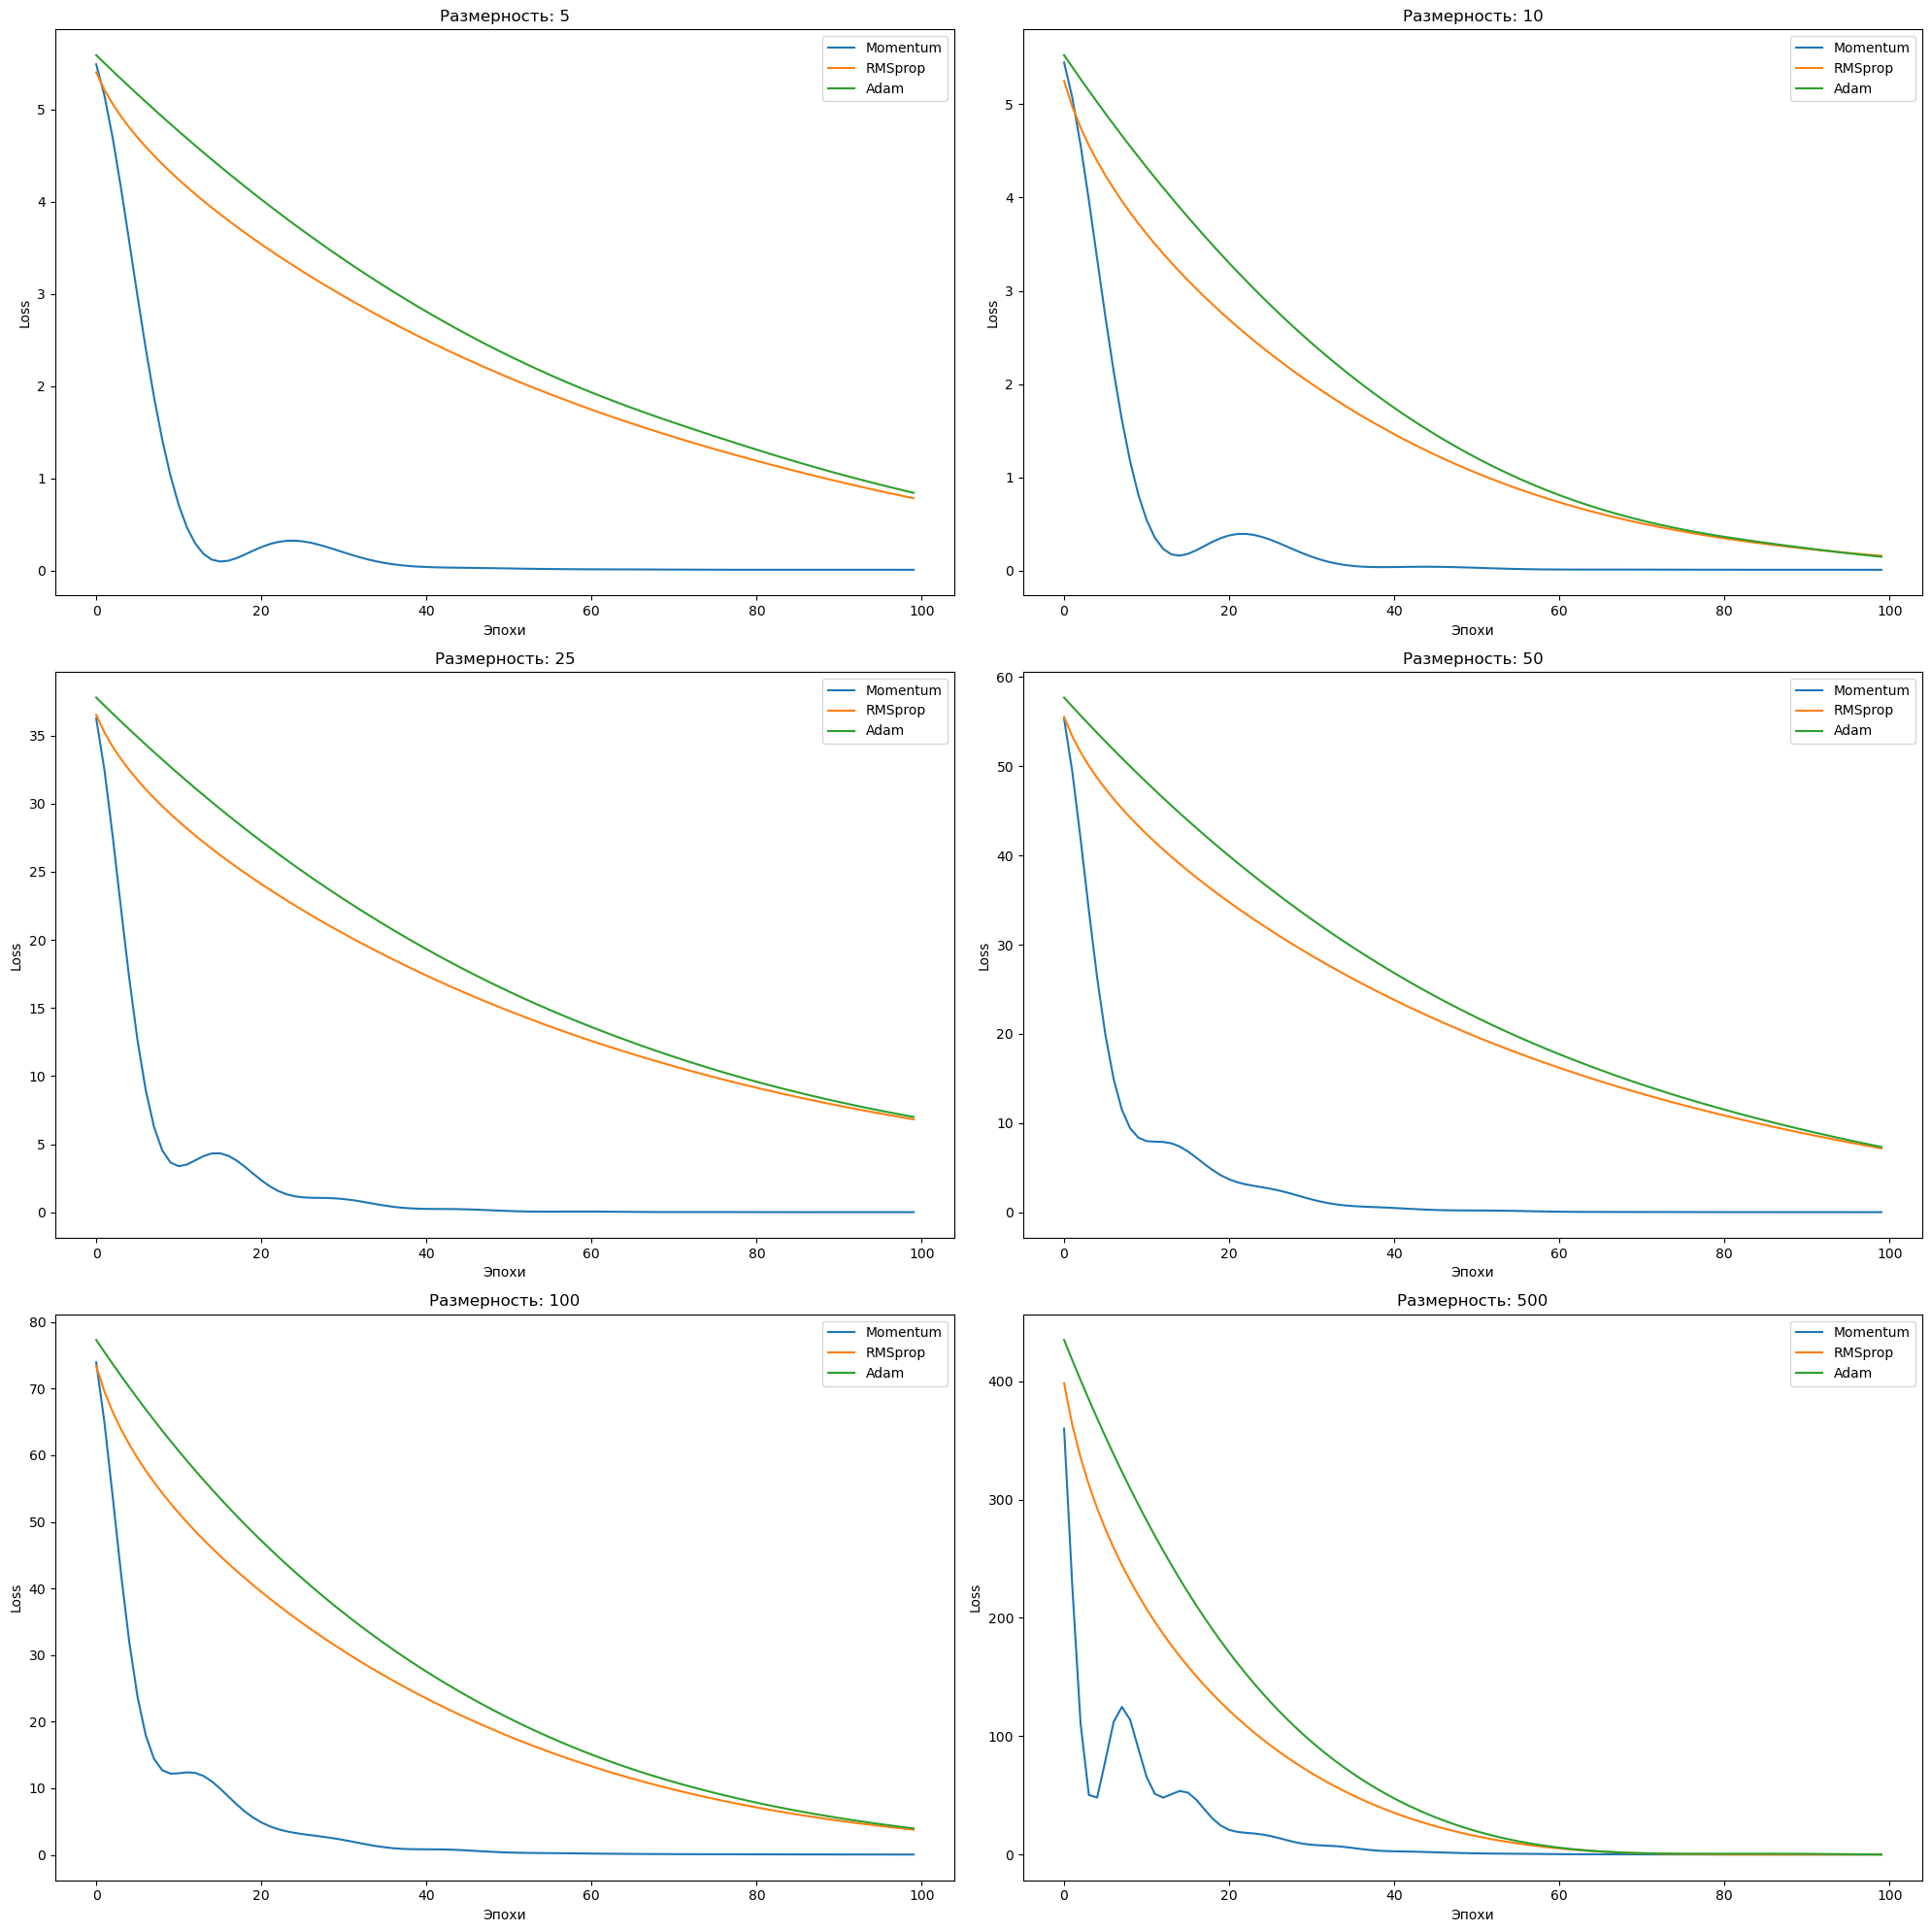

In [26]:

n_samples = 100
n_features_list = [5, 10, 25, 50, 100, 500]  

fig, axes = plt.subplots(3, len(n_features_list) // 3 + len(n_features_list) % 3, figsize=(20, 20))

for i, n_features in enumerate(n_features_list):
    row, col = divmod(i, (len(n_features_list) + 1) // 3)
    ax = axes[row, col]

    X, y, weights = generate_data(n_samples, n_features)
    
    _, losses_momentum = momentum(X, y)
    _, losses_rmsprop = rmsprop(X, y)
    _, losses_adam = adam(X, y)
    
    ax.plot(losses_momentum, label='Momentum')
    ax.plot(losses_rmsprop, label='RMSprop')
    ax.plot(losses_adam, label='Adam')
    ax.set_xlabel('Эпохи')
    ax.set_ylabel('Loss')
    ax.set_title(f'Размерность: {n_features}')
    ax.legend()

plt.tight_layout()
plt.show()



## Вывод
Можно заметить, что все три метода показывают убывающую динамику функции потерь. Однако, при сравнении этих подходов можно заметить, что быструю сходимость имеет метод Инерции. Также метод Инерции имеет на начальных этапах небольшие колебания, но потом стабилизируется и сходится быстрее, чем другие методы. RMSprop показывает более плавное убывание ошибки и без колебаний, но скорость ниже чем у первого описанного метода. Adam метод как известно включает в себе как первый, так и второй подход, но в данной задаче сходится медленее чем метод Инерции, но быстрее чем метод RMSprop. Это может происходить по той причине, что коэффициент бетта1 и бетта2 подобранны некорректно. 

При увеличении размерности все методы начинают сходиться медленее, кроме последнего случая при размерности 500. Можно заметить, что при больших размерностях метод Инерции начинает сильнее колебаться, а два других подхода демонстрируют стабильное поведение. 

